/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.4606 - loss: 2.4840 - val_accuracy: 0.4900 - val_loss: 0.8953
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5679 - loss: 0.8978 - val_accuracy: 0.5650 - val_loss: 0.7886
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5357 - loss: 0.8017 - val_accuracy: 0.5700 - val_loss: 0.7716
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5464 - loss: 0.7540 - val_accuracy: 0.5650 - val_loss: 0.7809
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5154 - loss: 0.7674 - val_accuracy: 0.5700 - val_loss: 0.6925
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5250 - loss: 0.7231 - val_accuracy: 0.5200 - val_loss: 0.7000
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5121 - loss: 0.7115 - val_accuracy: 0.4850 - val_loss: 0.7095
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5668 - loss: 0.7082 - val_accuracy: 0.5650 - va

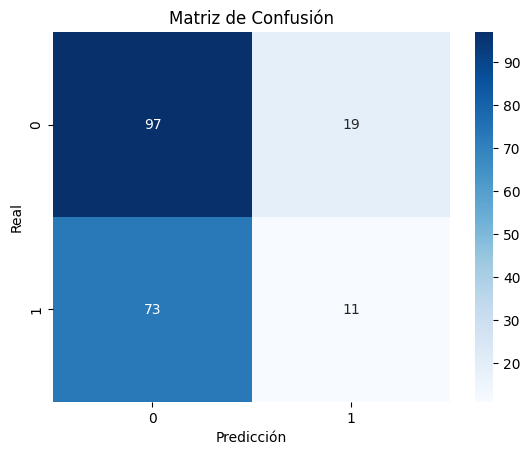

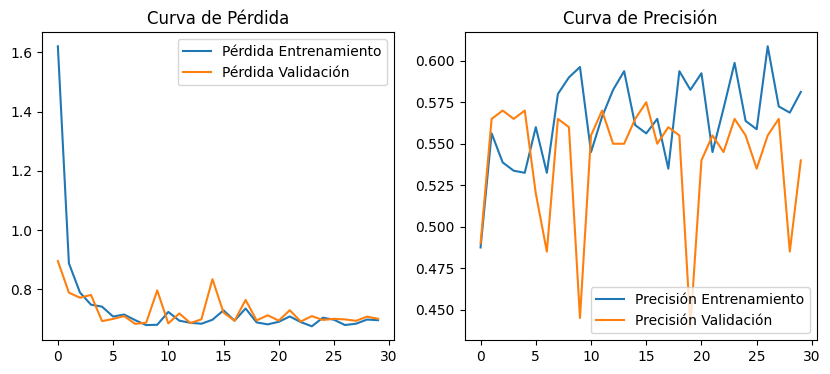

In [3]:

# Clasificación de Clientes Propensos a Abandonar el Carrito con TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# 1. Simulación de Datos (Dataset Sintético)
np.random.seed(42)
data = pd.DataFrame({
    'visitas_previas': np.random.randint(0, 15, 1000),
    'tiempo_sitio': np.random.uniform(0, 30, 1000),
    'productos_en_carrito': np.random.randint(1, 12, 1000),
    'total_carrito': np.random.uniform(5, 300, 1000),
    'abandona': np.random.choice([0, 1], size=1000, p=[0.6, 0.4])
})

# 2. Separación de variables predictoras y objetivo
X = data.drop('abandona', axis=1)
y = data['abandona']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Construcción del Modelo Base con TensorFlow
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# 4. Evaluación del Modelo
loss, accuracy = model.evaluate(X_test, y_test)
print("\nEvaluación del modelo base:")
print(f"Accuracy: {accuracy:.4f}")

# 5. Matriz de Confusión y Reporte de Clasificación
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# 6. Visualización del entrenamiento
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.legend()
plt.title('Curva de Pérdida')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.legend()
plt.title('Curva de Precisión')
plt.show()
